In [21]:
from environments.recommenders import movie_lens_fairness_env
import gym
import numpy as np

In [2]:
env = gym.make('MovieLensFairness-v0', slate_size=1)

In [3]:
env.observation_space

Box([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.], [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.], (25,), float32)

In [4]:
env.reset()

array([0.        , 0.01785714, 0.1       , 0.60660607, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [5]:
env.action_space

Discrete(3883)

In [6]:
random_slate = env.action_space.sample()

In [7]:
random_slate

1418

In [8]:
state, reward, done, info = env.step(random_slate)

In [9]:
state.size

25

In [10]:
reward

0.2

In [11]:
from  agents.recommenders.recsys.manager import MovieLensFairnessManager

In [12]:
from agents.recommenders.recsys.rl.base_agent import RandomAgent
from agents.recommenders.recsys.rl.dqn import DQNAgent
from agents.recommenders.recsys.rl.reinforce import ReinforceAgent
from agents.recommenders.recsys.rl.actor_critic import ActorCriticAgent

In [13]:
from agents.recommenders.recsys.statistics import LearningStatistics

In [14]:
seeds = [18,36,54]

## Random agent

In [27]:
random_agent_stats = LearningStatistics()

In [72]:
random_seed_stats = []
for seed in seeds:
    print(seed)
    manager = MovieLensFairnessManager(slate_size=1)
    random_agent_stats = LearningStatistics()
    random_agent = RandomAgent(action_space=manager.env.action_space)
    manager.train(random_agent, random_agent_stats, max_episodes=500, should_print=True)
    random_seed_stats.append(random_agent_stats)

18
Training...
Episode 499 Mean Rewards 31.95 Last Reward 45.66		36
Training...
Episode 499 Mean Rewards 31.95 Last Reward 45.66		54
Training...
Episode 499 Mean Rewards 31.95 Last Reward 45.66		

In [98]:
random_agent_stat_mean =  np.array([stat.moving_rewards for stat in random_seed_stats]).mean()

### DQN

In [73]:
dqn_seed_stats = []
for seed in seeds:
    print(seed)
    manager = MovieLensFairnessManager(slate_size=1)
    dqn_agent_stats = LearningStatistics()
    dqn_agent = DQNAgent(25, 3833, [128,128,32,32])
    manager.train(dqn_agent, dqn_agent_stats, max_episodes=500, should_print=True)
    dqn_seed_stats.append(dqn_agent_stats)

18
Training...
Episode 499 Mean Rewards 31.11 Last Reward 44.23		36
Training...
Episode 499 Mean Rewards 30.65 Last Reward 39.89		54
Training...
Episode 499 Mean Rewards 31.08 Last Reward 40.02		

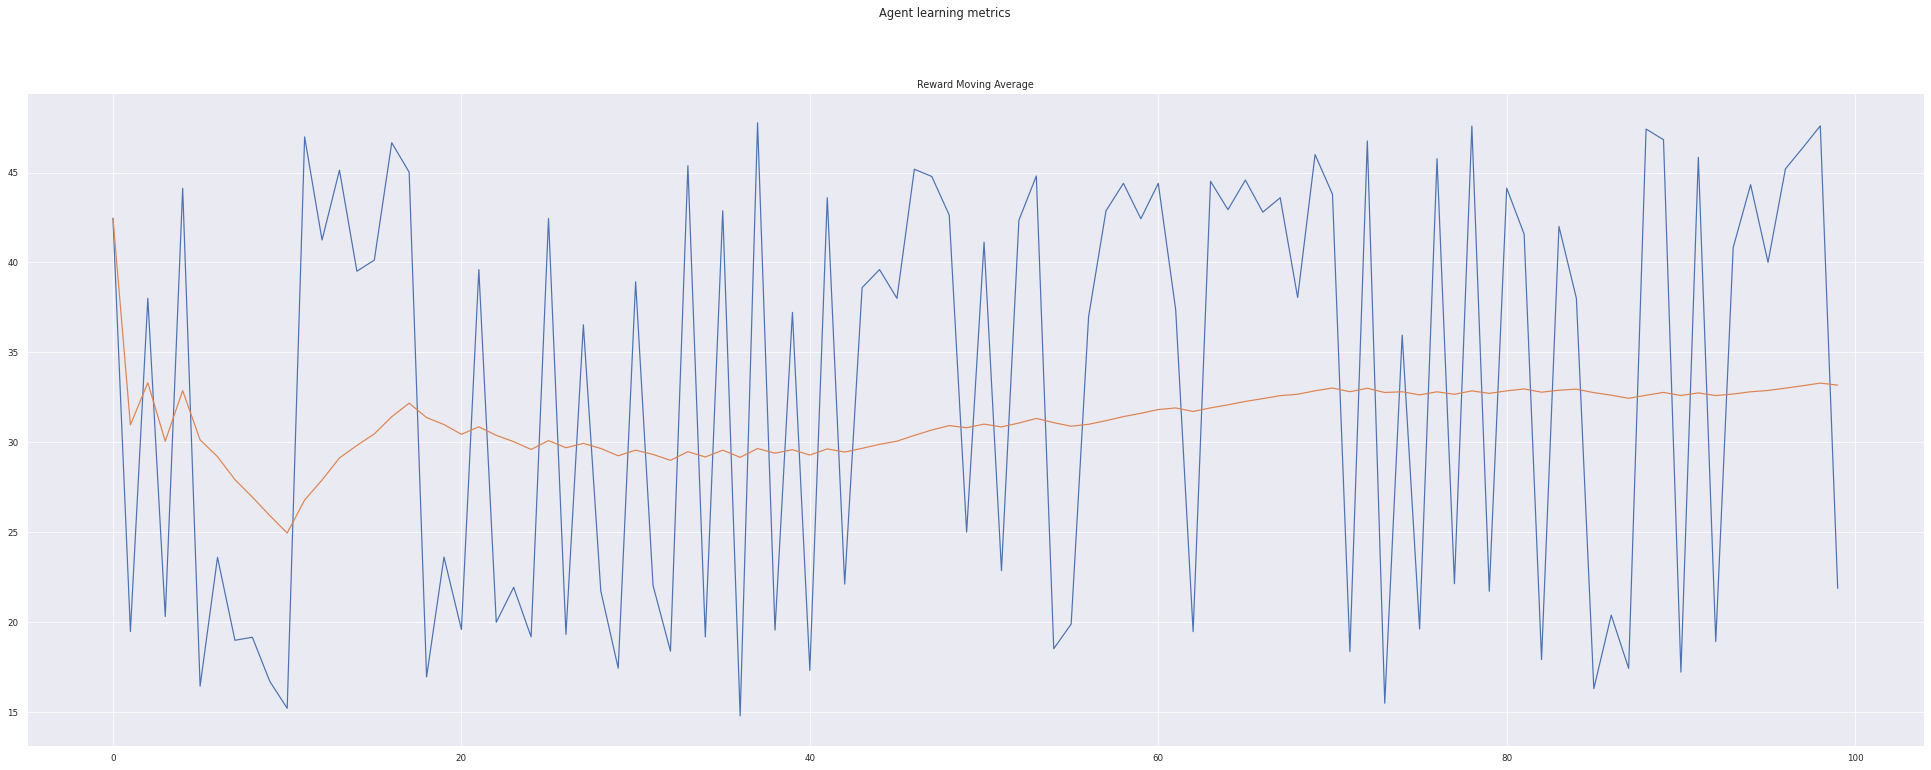

In [19]:
dqn_seed_stats[0].plot_learning_stats()

In [74]:
dqn_moving_avg = np.array([stat.moving_rewards for stat in dqn_seed_stats])
dqn_moving_avg_high = np.percentile(dqn_moving_avg, 95, axis=0)
dqn_moving_avg_mean = np.percentile(dqn_moving_avg, 50, axis=0)
dqn_moving_avg_low = np.percentile(dqn_moving_avg, 5, axis=0)

In [79]:
seed_stats =  np.array([stat.moving_rewards for stat in random_seed_stats]).mean(axis=0)

In [80]:
import matplotlib.pyplot as plt

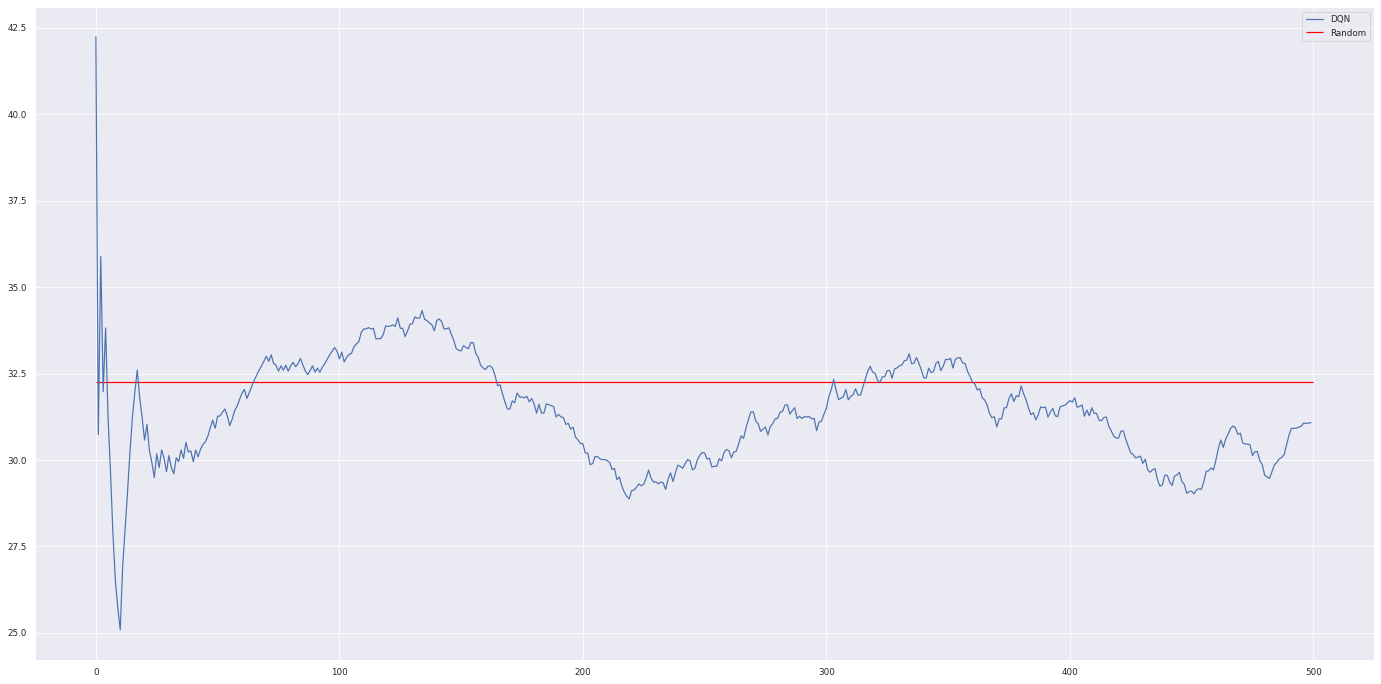

In [104]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(24)
# ax.plot(dqn_moving_avg_low, color='b', alpha=.8)
ax.plot(dqn_moving_avg_mean, label='DQN')
# ax.plot(random_agent_stat_mean, label='Random')
ax.hlines(random_agent_stat_mean, xmin=0, xmax=len(seed_stats), label='Random', colors='red')
plt.legend()
plt.show()
# ax.plot(dqn_moving_avg_high, color='b', alpha=.8)


In [24]:
dqn_agent = DQNAgent(25, 3833, [128,128,32,32])

In [25]:
manager.train(dqn_agent, stats, max_episodes=500, should_print=True)

Training...
Episode 19 Mean Rewards 34.23 Last Reward 16.40		

/home/dev/ml-fairness-gym-recism/agents/recommenders/recsys/nn/dqn.py:65: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  state_tensors = FloatTensor(states).to(device=self.device)


Episode 499 Mean Rewards 29.58 Last Reward 36.49		

## Reinforce

In [105]:
reinforce_seed_stats = []
for seed in seeds:
    print(seed)
    manager = MovieLensFairnessManager(slate_size=1)
    reinforce_agent_stats = LearningStatistics()
    reinforce_agent = ReinforceAgent(3883, state.size, [128,128])
    manager.train(reinforce_agent, reinforce_agent_stats, max_episodes=500, should_print=True)
    reinforce_seed_stats.append(reinforce_agent_stats)

18
Training...
Episode 499 Mean Rewards 31.71 Last Reward 41.87		36
Training...
Episode 499 Mean Rewards 31.82 Last Reward 45.27		54
Training...
Episode 499 Mean Rewards 30.11 Last Reward 29.51		

In [106]:
reinforce_moving_avg = np.array([stat.moving_rewards for stat in reinforce_seed_stats])
reinforce_moving_avg_high = np.percentile(reinforce_moving_avg, 95, axis=0)
reinforce_moving_avg_mean = np.percentile(reinforce_moving_avg, 50, axis=0)
reinforce_moving_avg_low = np.percentile(reinforce_moving_avg, 5, axis=0)

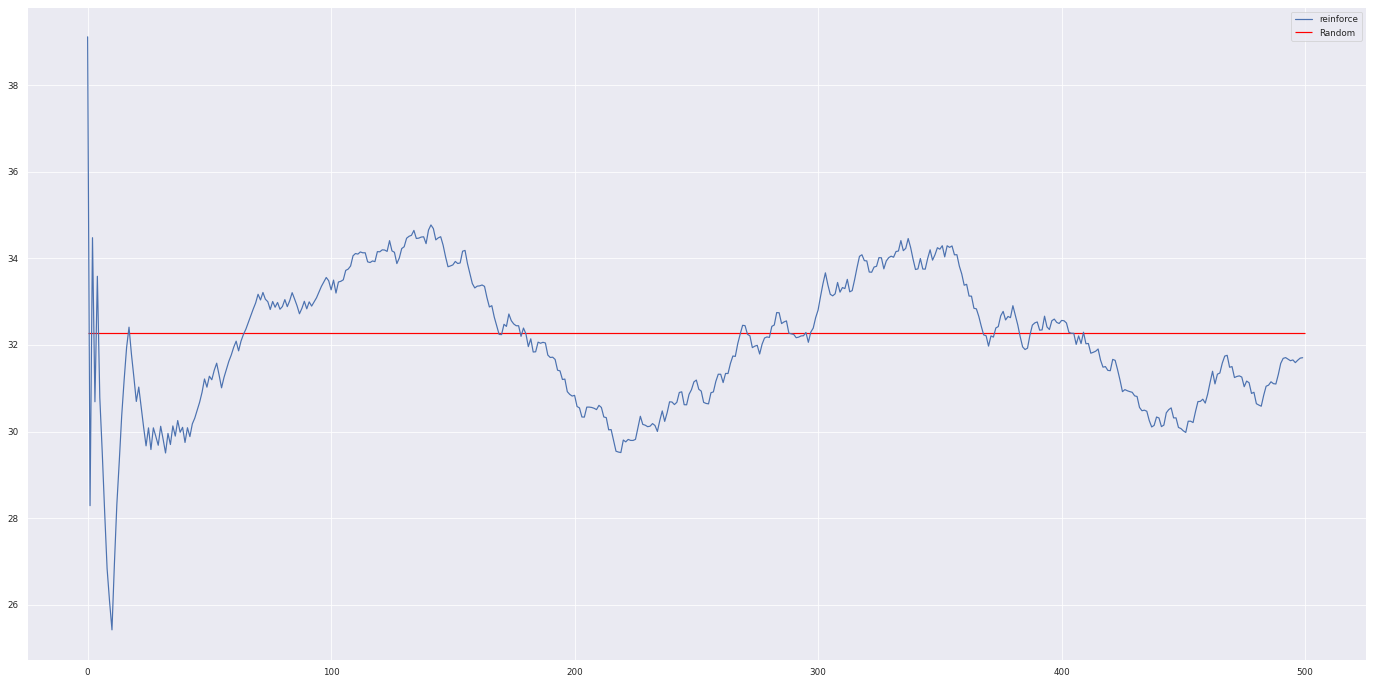

In [107]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(24)
# ax.plot(dqn_moving_avg_low, color='b', alpha=.8)
ax.plot(reinforce_moving_avg_mean, label='reinforce')
ax.hlines(random_agent_stat_mean, xmin=0, xmax=len(seed_stats), label='Random', colors='red')
plt.legend()
plt.show()

In [28]:
manager.train(reinforce_agent, stats, max_episodes=500, should_print=True)

Training...
Episode 499 Mean Rewards 30.91 Last Reward 20.66		

In [ ]:
stats.plot_learning_stats()

## Actor-critic

In [91]:
actor_critic_seed_stats = []
for seed in seeds:
    print(seed)
    manager = MovieLensFairnessManager(slate_size=1)
    actor_critic_agent_stats = LearningStatistics()
    actor_critic_agent = ActorCriticAgent(3883, state.size)
    manager.train(actor_critic_agent, actor_critic_agent_stats, max_episodes=500, should_print=True)
    actor_critic_seed_stats.append(actor_critic_agent_stats)

18
Training...
Episode 499 Mean Rewards 28.85 Last Reward 50.00		36
Training...
Episode 499 Mean Rewards 27.19 Last Reward 49.81		54
Training...
Episode 499 Mean Rewards 24.93 Last Reward 26.89		

In [94]:
actor_critic_moving_avg = np.array([stat.moving_rewards for stat in actor_critic_seed_stats])
actor_critic_moving_avg_high = np.percentile(actor_critic_moving_avg, 95, axis=0)
actor_critic_moving_avg_mean = np.percentile(actor_critic_moving_avg, 50, axis=0)
actor_critic_moving_avg_low = np.percentile(actor_critic_moving_avg, 5, axis=0)

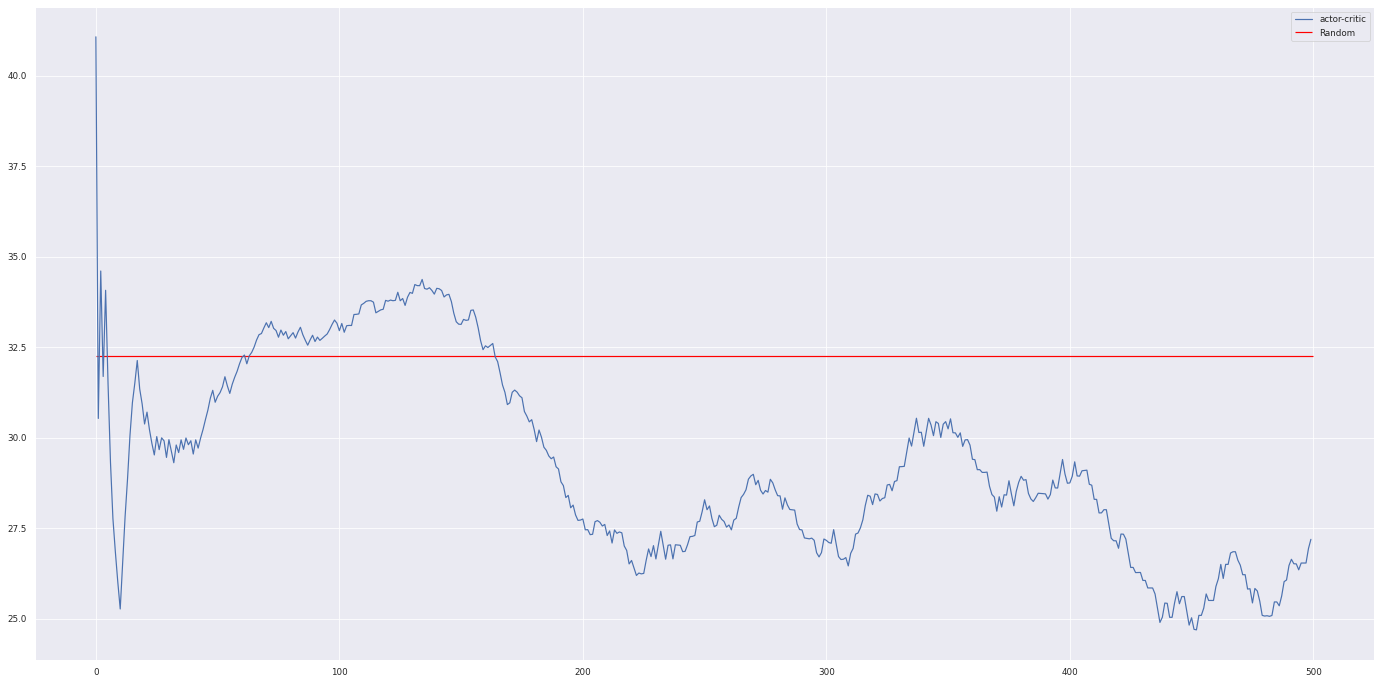

In [108]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(24)
# ax.plot(dqn_moving_avg_low, color='b', alpha=.8)
ax.plot(actor_critic_moving_avg_mean, label='actor-critic')
ax.hlines(random_agent_stat_mean, xmin=0, xmax=len(seed_stats), label='Random', colors='red')
plt.legend()
plt.show()